In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [117]:
multivariate_column_label=['AEDATZ_HO_V0', 'AEWIHO_T9AV2','AEDAHO_T9_V2'] # choose column with which the following work will be conducted
# univariate_column_label=['AEDAHO_T9_V2']
multivariate_data_1=test_new.iloc[1000:18000][multivariate_column_label] #just for checking whether it is working or not
print(multivariate_data_1.head())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEDAHO_T9_V2
dateTime                                                     
2019-04-11 03:13:00     38.083744     70.524097     57.155695
2019-04-11 03:12:00     40.384294     70.285642     57.558460
2019-04-11 03:11:00     42.719201     70.397320     57.608403
2019-04-11 03:10:00     42.191332     70.253869     57.454976
2019-04-11 03:09:00     40.603628     70.185290     57.315670


In [118]:
multivariate_data=multivariate_data_1.loc[::-1]

In [119]:
print(multivariate_data.head())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEDAHO_T9_V2
dateTime                                                     
2019-03-21 23:21:00     41.361023     77.228514     73.880073
2019-03-21 23:22:00     41.029029     76.970870     73.332486
2019-03-21 23:23:00     40.848848     77.603184     72.955013
2019-03-21 23:24:00     40.879590     77.513527     72.977738
2019-03-21 23:25:00     40.980816     77.091041     73.189071


In [120]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_mean=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [89]:
# # remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
# multi_mean=multivariate_data.mean()
# multivariate_data_mean= multivariate_data.replace(0,multi_mean)

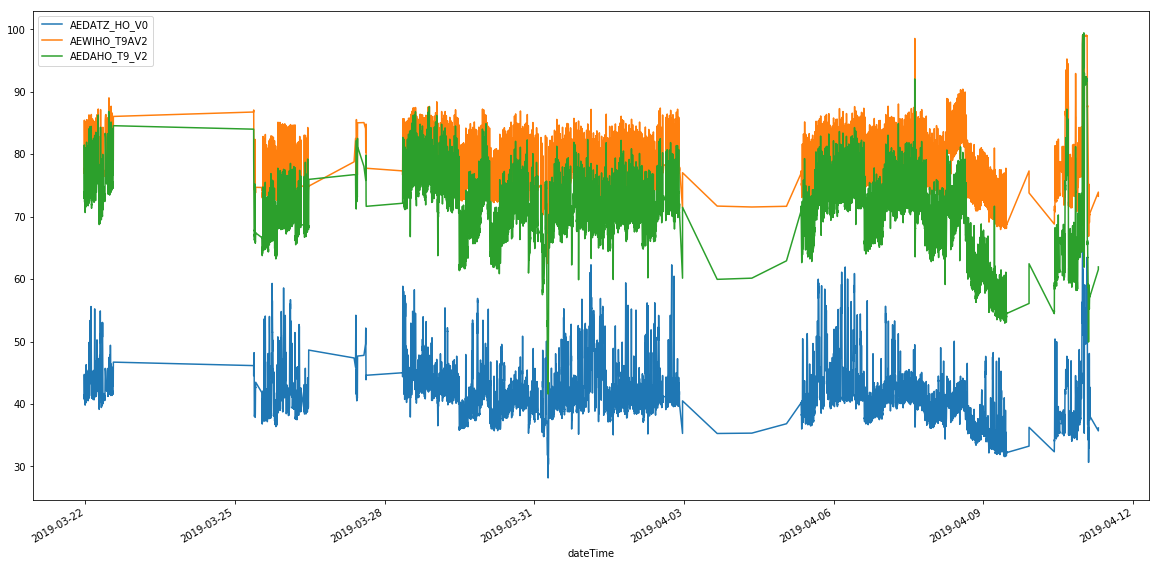

In [121]:
multivariate_data_mean.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [122]:
features = ['AEDATZ_HO_V0', 'AEWIHO_T9AV2']
target = ['AEDAHO_T9_V2']

In [123]:
x = multivariate_data_mean.loc[:, features].values
y = multivariate_data_mean.loc[:,target].values

In [124]:
print(type(y))

<class 'numpy.ndarray'>


In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [126]:
x_scaled = StandardScaler().fit_transform(x)
y_scaled = StandardScaler().fit_transform(y)

In [127]:
x_df = pd.DataFrame(data = x_scaled, columns = features, index=multivariate_data_mean.index)
print(x_df.shape)
print(x_df.head())

(16877, 2)
                     AEDATZ_HO_V0  AEWIHO_T9AV2
dateTime                                       
2019-03-21 23:21:00     -0.061091     -0.005126
2019-03-21 23:22:00     -0.129665     -0.068099
2019-03-21 23:23:00     -0.166881      0.086450
2019-03-21 23:24:00     -0.160531      0.064536
2019-03-21 23:25:00     -0.139623     -0.038727


In [128]:
y_df = pd.DataFrame(data=y_scaled, columns=target,index=multivariate_data_mean.index)
print(y_df.shape)
print(y_df.head())

(16877, 1)
                     AEDAHO_T9_V2
dateTime                         
2019-03-21 23:21:00      0.659329
2019-03-21 23:22:00      0.569727
2019-03-21 23:23:00      0.507961
2019-03-21 23:24:00      0.511680
2019-03-21 23:25:00      0.546260


# PCA projection

In [129]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index=multivariate_data_mean.index)

In [130]:
print(principalDf.shape)

(16877, 2)


In [131]:
print(principalDf.head())

                     principal component 1  principal component 2
dateTime                                                         
2019-03-21 23:21:00              -0.046823               0.039573
2019-03-21 23:22:00              -0.139840               0.043533
2019-03-21 23:23:00              -0.056874               0.179132
2019-03-21 23:24:00              -0.067879               0.159147
2019-03-21 23:25:00              -0.126113               0.071344


In [132]:
finalDf = pd.concat([principalDf, y_df], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,AEDAHO_T9_V2
dateTime,,,
2019-03-21 23:21:00,-0.046823,0.039573,0.659329
2019-03-21 23:22:00,-0.139840,0.043533,0.569727
2019-03-21 23:23:00,-0.056874,0.179132,0.507961
2019-03-21 23:24:00,-0.067879,0.159147,0.511680
2019-03-21 23:25:00,-0.126113,0.071344,0.546260


In [133]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 Component PCA', fontsize = 20)


# targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['target'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [134]:
pca.explained_variance_ratio_

array([0.71160134, 0.28839866])

In [135]:
dataset = np.array(finalDf)

In [136]:
print('shape: ',dataset.shape)
print('length: ', len(dataset))

shape:  (16877, 3)
length:  16877


In [137]:
NumberOfElements=int(len(dataset)*0.95)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)

Number of Elements for training:  16033
dataset length:  16877
train_input shape:  (16033, 2)
train_output shape:  (16033,)
test_input shape:  (844, 2)
test_output shape:  (844,)


# Linear Regression after PCA

In [138]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [139]:
train_model=LinearRegression(fit_intercept=False,normalize=True).fit(train_input,train_output)
print(train_model)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)


In [140]:
predicted_output=train_model.predict(test_input)

In [141]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

Slope: [0.70418552 0.24434892]
Intercept: 0.0
r_2 statistic: 0.80
Mean_absolute_error: 0.67
Mean squared error: 0.75
RMSE:  0.8681072062898764


size of actual op:  844
size of predicted op:  844


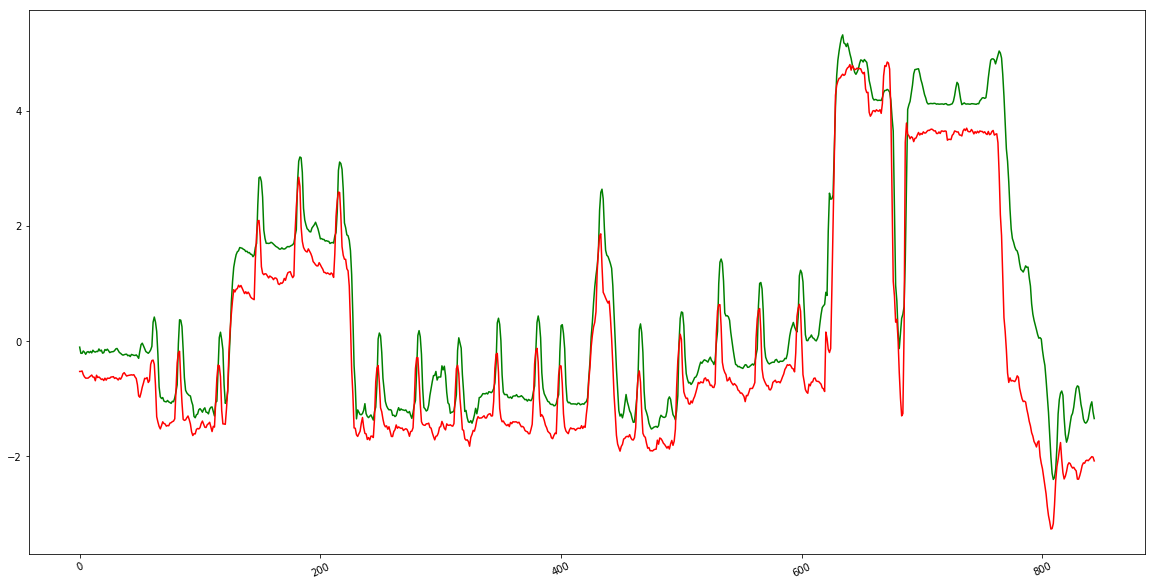

In [142]:
print('size of actual op: ',test_output.size)
print('size of predicted op: ',predicted_output.size)
plt.plot(predicted_output,color='green')
plt.plot(test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

# Check result again after Inverse Normalization

In [143]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=multivariate_data_mean[val].max()
    q=[val,x]
    max_array.append(q)

In [144]:
target_column_max_value=max_array[-1][-1]
print(target_column_max_value)

99.4516393320581


In [145]:
Unnormalized_predicted_output = predicted_output*target_column_max_value
Unnormalized_test_output = test_output*target_column_max_value

print('size of Unnormalized_predicted_output:  ', Unnormalized_predicted_output.size)
print('size of Unnormalized_test_output:  ', Unnormalized_test_output.size)

size of Unnormalized_predicted_output:   844
size of Unnormalized_test_output:   844


In [146]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(Unnormalized_test_output, Unnormalized_predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(Unnormalized_test_output, Unnormalized_predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(Unnormalized_test_output, Unnormalized_predicted_output))
RMSE=math.sqrt(mean_squared_error(Unnormalized_test_output, Unnormalized_predicted_output))
print('RMSE: ',RMSE)

Slope: [0.70418552 0.24434892]
Intercept: 0.0
r_2 statistic: 0.80
Mean_absolute_error: 66.64
Mean squared error: 7453.68
RMSE:  86.33468478150134


size of actual op:  844
size of predicted op:  844


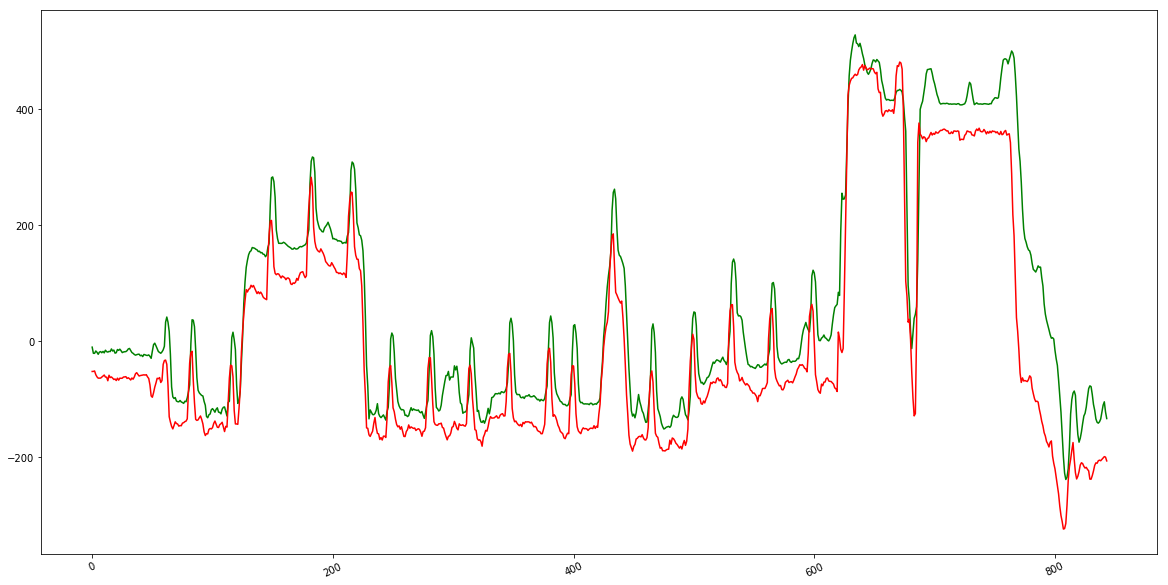

In [147]:
print('size of actual op: ',Unnormalized_test_output.size)
print('size of predicted op: ',Unnormalized_predicted_output.size)
plt.plot(Unnormalized_predicted_output,color='green')
plt.plot(Unnormalized_test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

# Below linear regression performed without applying PCA

In [149]:
print(multivariate_data_mean.head())
print(multivariate_data_mean.shape)

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEDAHO_T9_V2
dateTime                                                     
2019-03-21 23:21:00     41.361023     77.228514     73.880073
2019-03-21 23:22:00     41.029029     76.970870     73.332486
2019-03-21 23:23:00     40.848848     77.603184     72.955013
2019-03-21 23:24:00     40.879590     77.513527     72.977738
2019-03-21 23:25:00     40.980816     77.091041     73.189071
(16877, 3)


In [150]:
datasetWithoutPCA = np.array(multivariate_data_mean)

In [151]:
NumberOfElements_1=int(len(datasetWithoutPCA)*0.95)
print('Number of Elements for training: ',NumberOfElements_1)
print('dataset length: ',len(datasetWithoutPCA))

train_input_1=datasetWithoutPCA[0:NumberOfElements_1,0:-1]
print('train_input_1 shape: ',train_input_1.shape)
train_output_1=datasetWithoutPCA[0:NumberOfElements_1,-1]
print('train_output_1 shape: ',train_output_1.shape)

test_input_1=datasetWithoutPCA[NumberOfElements_1:len(datasetWithoutPCA),0:-1]
print('test_input_1 shape: ',test_input_1.shape)
test_output_1=datasetWithoutPCA[NumberOfElements_1:len(datasetWithoutPCA),-1]
print('test_output_1 shape: ',test_output_1.shape)

Number of Elements for training:  16033
dataset length:  16877
train_input_1 shape:  (16033, 2)
train_output_1 shape:  (16033,)
test_input_1 shape:  (844, 2)
test_output_1 shape:  (844,)


In [154]:
train_model_1=LinearRegression(fit_intercept=False,normalize=True).fit(train_input_1,train_output_1)
print(train_model_1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)


In [155]:
predicted_output_1=train_model_1.predict(test_input_1)

In [156]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model_1.coef_)
print('Intercept:', train_model_1.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output_1,predicted_output_1))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output_1,predicted_output_1))
print("Mean squared error: %.2f" % mean_squared_error(test_output_1,predicted_output_1))
RMSE=math.sqrt(mean_squared_error(test_output_1,predicted_output_1))
print('RMSE: ',RMSE)

Slope: [0.39820203 0.69198563]
Intercept: 0.0
r_2 statistic: 0.81
Mean_absolute_error: 4.23
Mean squared error: 26.66
RMSE:  5.163789696961294


size of actual op:  844
size of predicted op:  844


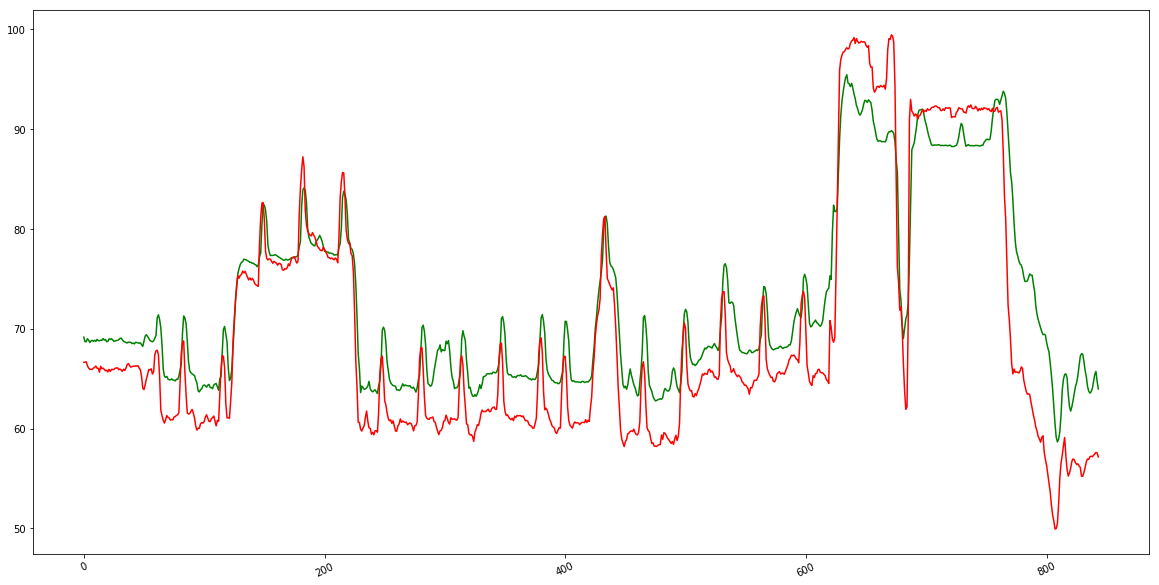

In [157]:
print('size of actual op: ',test_output_1.size)
print('size of predicted op: ',predicted_output_1.size)
plt.plot(predicted_output_1,color='green')
plt.plot(test_output_1,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

# Test linear regression using Normalization and without using PCA

In [159]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
df_normalized = pd.DataFrame(np_scaled,index=multivariate_data_mean.index,columns=multivariate_column_label)

In [161]:
df_normalized.head()

,AEDATZ_HO_V0,AEWIHO_T9AV2,AEDAHO_T9_V2
dateTime,,,
2019-03-21 23:21:00,0.334658,0.403374,0.558026
2019-03-21 23:22:00,0.326244,0.396325,0.548561
2019-03-21 23:23:00,0.321677,0.413624,0.542037
2019-03-21 23:24:00,0.322456,0.411171,0.542430
2019-03-21 23:25:00,0.325022,0.399613,0.546083


In [162]:
dataset_norm=np.array(df_normalized)

In [163]:
print(dataset_norm.shape)

(16877, 3)


In [165]:
NumberOfElements_norm=int(len(dataset_norm)*0.95)
print('Number of Elements for training: ',NumberOfElements_norm)
print('dataset_norm length: ',len(dataset_norm))

train_input_norm=dataset_norm[0:NumberOfElements_norm,0:-1]
print('train_input_norm shape: ',train_input_norm.shape)
train_output_norm=dataset_norm[0:NumberOfElements_norm,-1]
print('train_output_norm shape: ',train_output_norm.shape)

test_input_norm=dataset_norm[NumberOfElements_norm:len(dataset_norm),0:-1]
print('test_input_norm shape: ',test_input_norm.shape)
test_output_norm=dataset_norm[NumberOfElements_norm:len(dataset_norm),-1]
print('test_output_norm shape: ',test_output_norm.shape)

Number of Elements for training:  16033
dataset_norm length:  16877
train_input_norm shape:  (16033, 2)
train_output_norm shape:  (16033,)
test_input_norm shape:  (844, 2)
test_output_norm shape:  (844,)


In [166]:
train_model_norm=LinearRegression(fit_intercept=False,normalize=True).fit(train_input_norm,train_output_norm)
print(train_model_norm)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)


In [167]:
predicted_output_norm=train_model_norm.predict(test_input_norm)

In [168]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model_norm.coef_)
print('Intercept:', train_model_norm.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output_norm,predicted_output_norm))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output_norm,predicted_output_norm))
print("Mean squared error: %.2f" % mean_squared_error(test_output_norm,predicted_output_norm))
RMSE=math.sqrt(mean_squared_error(test_output_norm,predicted_output_norm))
print('RMSE: ',RMSE)

Slope: [0.36928799 0.89167283]
Intercept: 0.0
r_2 statistic: 0.52
Mean_absolute_error: 0.10
Mean squared error: 0.02
RMSE:  0.14343967464331095


size of actual op:  844
size of predicted op:  844


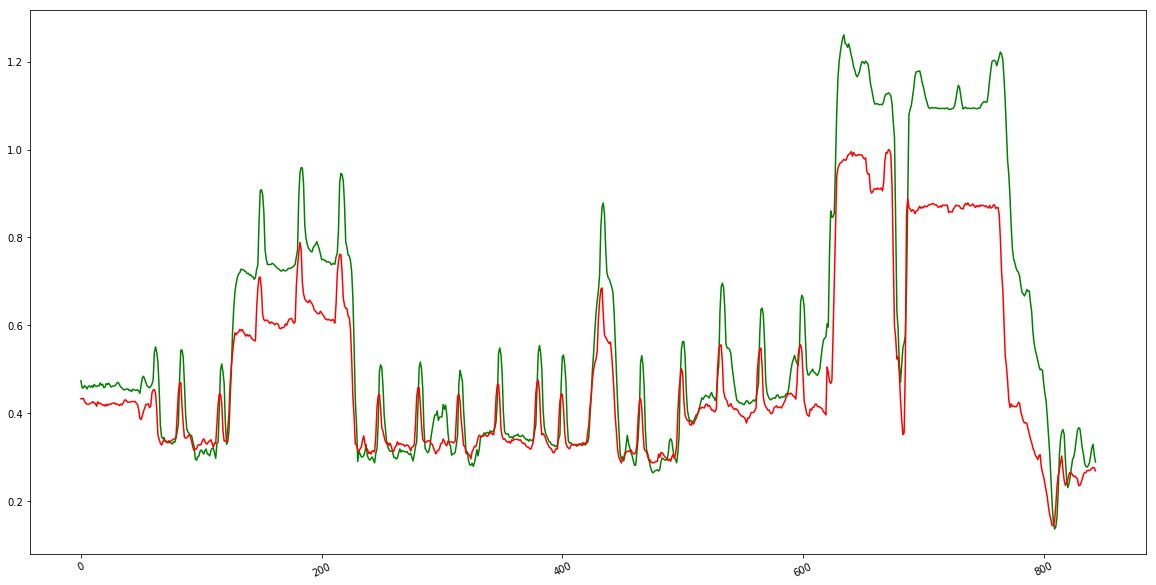

In [169]:
print('size of actual op: ',test_output_norm.size)
print('size of predicted op: ',predicted_output_norm.size)
plt.plot(predicted_output_norm,color='green')
plt.plot(test_output_norm,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

# Now denormalized the data and used normalized trained model to test again

In [170]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=multivariate_data_mean[val].max()
    q=[val,x]
    max_array.append(q)

In [171]:
target_column_max_value=max_array[-1][-1]
print(target_column_max_value)

99.4516393320581


In [173]:
unnormalized_predicted_output_norm = predicted_output_norm*target_column_max_value
unnormalized_test_output_norm = test_output_norm*target_column_max_value

In [175]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model_norm.coef_)
print('Intercept:', train_model_norm.intercept_)
print('r_2 statistic: %.2f' % r2_score(unnormalized_test_output_norm,unnormalized_predicted_output_norm))
print("Mean_absolute_error: %.2f" % mean_absolute_error(unnormalized_test_output_norm,unnormalized_predicted_output_norm))
print("Mean squared error: %.2f" % mean_squared_error(unnormalized_test_output_norm,unnormalized_predicted_output_norm))
RMSE=math.sqrt(mean_squared_error(unnormalized_test_output_norm,unnormalized_predicted_output_norm))
print('RMSE: ',RMSE)

Slope: [0.36928799 0.89167283]
Intercept: 0.0
r_2 statistic: 0.52
Mean_absolute_error: 10.12
Mean squared error: 203.50
RMSE:  14.26531078853432


size of actual op:  844
size of predicted op:  844


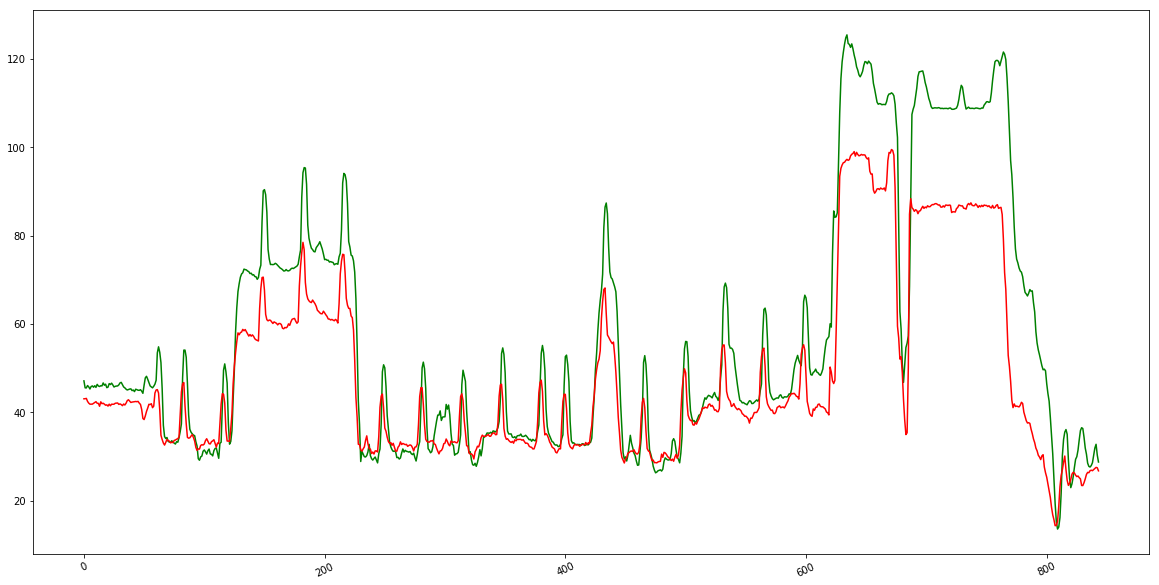

In [176]:
print('size of actual op: ',unnormalized_test_output_norm.size)
print('size of predicted op: ',unnormalized_predicted_output_norm.size)
plt.plot(unnormalized_predicted_output_norm,color='green')
plt.plot(unnormalized_test_output_norm,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()